In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import sqlite3

In [ ]:
con=sqlite3.connect(r'/content/database.sqlite')

In [ ]:
type(con)

sqlite3.Connection

In [ ]:
df=pd.read_sql_query('SELECT * FROM REVIEWS', con)

In [ ]:
df.shape

(568454, 10)

In [ ]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [ ]:
df['HelpfulnessNumerator']>df['HelpfulnessDenominator'] # invalid rows

,0
0,False
1,False
2,False
3,False
4,False
...,...
568449,False
568450,False
568451,False
568452,False


In [ ]:
df[df['HelpfulnessNumerator']>df['HelpfulnessDenominator']] # invalid rows found

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [ ]:
df_valid=df[df['HelpfulnessNumerator']<=df['HelpfulnessDenominator']]# valid rows

In [ ]:
df_valid.shape

(568452, 10)

In [ ]:
df_valid.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [ ]:
df_valid.duplicated(['UserId','ProfileName','Time','Text'])

,0
0,False
1,False
2,False
3,False
4,False
...,...
568449,False
568450,False
568451,False
568452,False


In [ ]:
df_valid[df_valid.duplicated(['UserId','ProfileName','Time','Text'])]# select the duplicate rows in the table

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
29,30,B0001PB9FY,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
1973,1974,B0017165OG,A2EPNS38TTLZYN,tedebear,0,0,3,1312675200,Pok Chops,The pork chops from Omaha Steaks were very tas...
2309,2310,B0001VWE0M,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
2323,2324,B0001VWE0C,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
...,...,...,...,...,...,...,...,...,...,...
568409,568410,B0018CLWM4,A2PE0AGWV6OPL7,Dark Water Mermaid,3,3,5,1309651200,Quality & affordable food,I was very pleased with the ingredient quality...
568410,568411,B0018CLWM4,A88HLWDCU57WG,R28,2,2,5,1332979200,litter box,My main reason for the five star review has to...
568411,568412,B0018CLWM4,AUX1HSY8FX55S,DAW,1,1,5,1319500800,Happy Camper,I bought this to try on two registered Maine C...
568412,568413,B0018CLWM4,AVZ2OZ479Q9E8,Ai Ling Chow,0,0,5,1336435200,Two Siberians like it!,When we brought home two 3-month-old purebred ...


In [ ]:
data=df_valid.drop_duplicates(subset=['UserId','ProfileName','Time','Text'])# drop the duplicate rows

In [ ]:
data.shape# duplicate values from the four parameters is removed plus the invalid data from the two rows is also removed and saved in data


(393931, 10)

In [ ]:
# Data Type
data.dtypes

,0
Id,int64
ProductId,object
UserId,object
ProfileName,object
HelpfulnessNumerator,int64
HelpfulnessDenominator,int64
Score,int64
Time,int64
Summary,object
Text,object


In [ ]:
data['Time']

,Time
0,1303862400
1,1346976000
2,1219017600
3,1307923200
4,1350777600
...,...
568449,1299628800
568450,1331251200
568451,1329782400
568452,1331596800


In [ ]:
pd.to_datetime(data['Time'],unit='s')

,Time
0,2011-04-27
1,2012-09-07
2,2008-08-18
3,2011-06-13
4,2012-10-21
...,...
568449,2011-03-09
568450,2012-03-09
568451,2012-02-21
568452,2012-03-13


WE have removed invalid rows removed duplicate rows , convert the time data type in datetime format .

In [ ]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [ ]:
data['ProfileName']

,ProfileName
0,delmartian
1,dll pa
2,"Natalia Corres ""Natalia Corres"""
3,Karl
4,"Michael D. Bigham ""M. Wassir"""
...,...
568449,Lettie D. Carter
568450,R. Sawyer
568451,"pksd ""pk_007"""
568452,"Kathy A. Welch ""katwel"""


In [ ]:
data['ProfileName'].nunique()# returning number of unique name but the profile name can be same

218418

In [ ]:
data['UserId'].nunique()

256059

In [ ]:
recomended_df=data.groupby(['UserId']).agg({'Summary':'count','Text':'count','Score':'mean','ProductId':'count'}).sort_values(by='ProductId',ascending=False)

In [ ]:
recomended_df

,Summary,Text,Score,ProductId
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
...,...,...,...,...
A2E80MDB9TCNGW,1,1,3.000000,1
A2E80RT3HOR35T,1,1,5.000000,1
A2E816C5N51F6X,1,1,5.000000,1


In [ ]:
recomended_df.columns=['Number_of_summaries','Number_of_text','avg_score','Number_of_product_brought']

In [ ]:
recomended_df

,Number_of_summaries,Number_of_text,avg_score,Number_of_product_brought
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
...,...,...,...,...
A2E80MDB9TCNGW,1,1,3.000000,1
A2E80RT3HOR35T,1,1,5.000000,1
A2E816C5N51F6X,1,1,5.000000,1


In [ ]:
recomended_df.head(10)

,Number_of_summaries,Number_of_text,avg_score,Number_of_product_brought
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
A2MUGFV2TDQ47K,161,161,3.826087,161
A3D6OI36USYOU1,146,146,4.417808,146
AZV26LP92E6WU,129,129,4.852713,129
AKMEY1BSHSDG7,119,119,4.747899,119


In [ ]:
recomended_df.index[0:10]

Index(['AY12DBB0U420B', 'A3OXHLG6DIBRW8', 'A281NPSIMI1C2R', 'A1YUL9PCJR3JTY',
       'A1Z54EM24Y40LL', 'A2MUGFV2TDQ47K', 'A3D6OI36USYOU1', 'AZV26LP92E6WU',
       'AKMEY1BSHSDG7', 'A2GEZJHBV92EVR'],
      dtype='object', name='UserId')

In [ ]:
recomended_df['Number_of_product_brought'][0:10]

,Number_of_product_brought
UserId,
AY12DBB0U420B,329
A3OXHLG6DIBRW8,278
A281NPSIMI1C2R,259
A1YUL9PCJR3JTY,214
A1Z54EM24Y40LL,211
A2MUGFV2TDQ47K,161
A3D6OI36USYOU1,146
AZV26LP92E6WU,129
AKMEY1BSHSDG7,119


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'AY12DBB0U420B'),
  Text(1, 0, 'A3OXHLG6DIBRW8'),
  Text(2, 0, 'A281NPSIMI1C2R'),
  Text(3, 0, 'A1YUL9PCJR3JTY'),
  Text(4, 0, 'A1Z54EM24Y40LL'),
  Text(5, 0, 'A2MUGFV2TDQ47K'),
  Text(6, 0, 'A3D6OI36USYOU1'),
  Text(7, 0, 'AZV26LP92E6WU'),
  Text(8, 0, 'AKMEY1BSHSDG7'),
  Text(9, 0, 'A2GEZJHBV92EVR')])

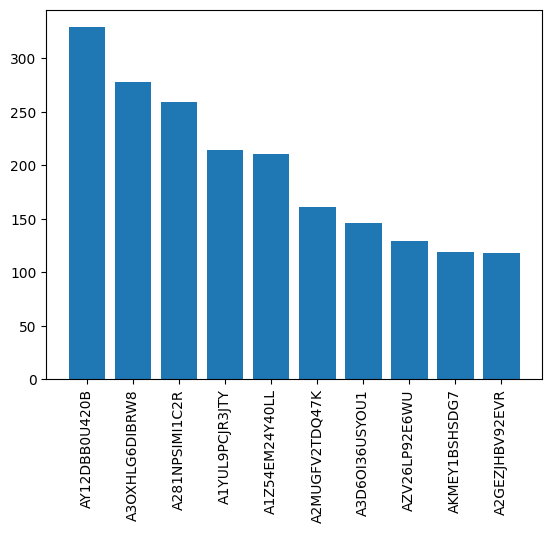

In [ ]:
plt.bar(recomended_df.index[0:10],recomended_df['Number_of_product_brought'][0:10].values)
plt.xticks(rotation='vertical')

Which product have good number of product

In [ ]:
len(data['ProductId'].unique())

67624

In [ ]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [ ]:
prod_count = data['ProductId'].value_counts().to_frame()
prod_count.rename(columns={prod_count.columns[0]: 'ProductId'}, inplace=True) # Rename the default column to 'ProductId'
prod_count[prod_count['ProductId'] > 500]

,ProductId
ProductId,
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
B000KV61FC,556
B000UBD88A,542
B000NMJWZO,542
B005K4Q37A,541


In [ ]:
frequent_product_id=prod_count[prod_count['ProductId']>500].index

In [ ]:
frequent_product_id

Index(['B007JFMH8M', 'B002QWP89S', 'B003B3OOPA', 'B001EO5Q64', 'B0013NUGDE',
       'B000KV61FC', 'B000UBD88A', 'B000NMJWZO', 'B005K4Q37A', 'B0090X8IPM',
       'B005ZBZLT4'],
      dtype='object', name='ProductId')

In [ ]:
data['ProductId'].isin(frequent_product_id)

,ProductId
0,False
1,False
2,False
3,False
4,False
...,...
568449,False
568450,False
568451,False
568452,False


In [87]:
freq=data[data['ProductId'].isin(frequent_product_id)]

In [88]:
freq

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
20982,20983,B002QWP89S,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,1318896000,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...
20983,20984,B002QWP89S,A17TDUBB4Z1PEC,jaded_green,1,1,5,1318550400,genuine Greenies best price,"These are genuine Greenies product, not a knoc..."
20984,20985,B002QWP89S,ABQH3WAWMSMBH,tenisbrat87,1,1,5,1317168000,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d..."
20985,20986,B002QWP89S,AVTY5M74VA1BJ,tarotqueen,1,1,5,1316822400,dogs love greenies,"What can I say, dogs love greenies. They begg ..."
20986,20987,B002QWP89S,A13TNN54ZEAUB1,dcz2221,1,1,5,1316736000,Greenies review,This review is for a box of Greenies Lite for ...
...,...,...,...,...,...,...,...,...,...,...
563878,563879,B007JFMH8M,A366PSH7KFLRPB,TheRosySnail,0,0,5,1343520000,Yummy!,I loved these cookies and so did my kids. You ...
563879,563880,B007JFMH8M,A2KV6EYQPKJRR5,Kelley,0,0,5,1343433600,Quaker Soft Baked Cookies,This is a great tasting cookie. It is very sof...
563880,563881,B007JFMH8M,A3O7REI0OSV89M,Esme,0,0,4,1343433600,Delicious!,These are great for a quick snack! They are sa...
563881,563882,B007JFMH8M,A9JS5GQQ6GIQT,Syne,0,0,5,1343433600,yummy,I love the Quaker soft baked cookies. The rea...


<Axes: xlabel='count', ylabel='ProductId'>

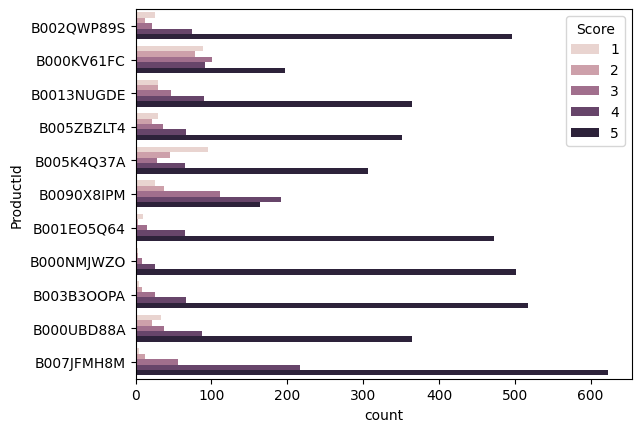

In [90]:
sns.countplot(y='ProductId',data=freq,hue='Score')

This graph answer the question which product id product are sold most and there rating (score) accordingly.


In [91]:
# Is there a difference between frequent and not frequent viewers.
#50 frequent viewers > not frequent viewers
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [95]:
data['UserId'].value_counts()

,count
UserId,
AY12DBB0U420B,329
A3OXHLG6DIBRW8,278
A281NPSIMI1C2R,259
A1YUL9PCJR3JTY,214
A1Z54EM24Y40LL,211
...,...
AAQPR1MSRXKTU,1
AGO81Z6PZSF7P,1
ALA84XWMTQBFT,1


In [101]:
x=data['UserId'].value_counts()

In [97]:
data.head(7)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...


In [111]:
data['UserId'].apply(lambda user: "Frequent" if x[user]>50 else "Not Frequent")

,UserId
0,Not Frequent
1,Not Frequent
2,Not Frequent
3,Not Frequent
4,Not Frequent
...,...
568449,Not Frequent
568450,Not Frequent
568451,Not Frequent
568452,Not Frequent


In [106]:
x['A3SGXH7AUHU8GW']

1

In [109]:
data['viewers_type']=data['UserId'].apply(lambda user: "Frequent" if x[user]>50 else "Not Frequent")

<ipython-input-109-10a13114e747>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['viewers_type']=data['UserId'].apply(lambda user: "Frequent" if x[user]>50 else "Not Frequent")


In [112]:
data.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewers_type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent


In [113]:
data['viewers_type'].value_counts()

,count
viewers_type,
Not Frequent,384573
Frequent,9358


In [116]:
data['viewers_type'].unique()

array(['Not Frequent', 'Frequent'], dtype=object)

In [119]:
data[data['viewers_type']=='Not Frequent']

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewers_type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent
...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,Not Frequent
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,Not Frequent
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",Not Frequent
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,Not Frequent


In [120]:
not_f=data[data['viewers_type']=='Not Frequent']

In [122]:
data[data['viewers_type']=='Frequent']

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewers_type
14,15,B001GVISJM,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",4,5,5,1268352000,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...,Frequent
44,45,B001EO5QW8,A2G7B7FKP2O2PU,D. Leschke,0,0,5,1209686400,Great taste and convenience,We really like the McCann's steel cut oats but...,Frequent
46,47,B001EO5QW8,AQLL2R1PPR46X,grumpyrainbow,0,0,5,1192752000,good,Good oatmeal. I like the apple cinnamon the b...,Frequent
109,110,B001REEG6C,AY12DBB0U420B,Gary Peterson,0,0,5,1316390400,My Idea of a Good Diet Food.,I'm presently on a diet and I was at my Fresh ...,Frequent
141,142,B001GVISJW,A2YIO225BTKVPU,"Angel_Boy ""Treat the people around you the wa...",0,0,4,1301788800,Good Licorice,Twizzlers brand licorice is much better than t...,Frequent
...,...,...,...,...,...,...,...,...,...,...,...
568238,568239,B002OXLXLG,A1Z54EM24Y40LL,c2,0,0,5,1310601600,Great replacement for the Girl Scout version!,If you failed to purchase enough of the Mint G...,Frequent
568261,568262,B00374ZKQ0,A2GEZJHBV92EVR,History buff,0,0,5,1345075200,Very good alternative to sugar.,I have tried many of the no sugar sweeteners o...,Frequent
568317,568318,B0013Z0PTW,A1ODOGXEYECQQ8,Nuknuk,0,0,4,1226880000,Good Tasting Granola Bars,Most health bars taste awful. Fiber One Grano...,Frequent
568331,568332,B001BOAOLY,A36MP37DITBU6F,"Enchanted In Dixie ""Enchanted""",6,6,4,1244419200,GREAT ORGANIC Honey flavor Hard candy. Great c...,These are delicious organic hard candies. I on...,Frequent


In [121]:
f=data[data['viewers_type']=='Frequent']

In [123]:
f['Score'].value_counts()

,count
Score,
5,5765
4,1979
3,897
2,368
1,349


<Axes: xlabel='Score'>

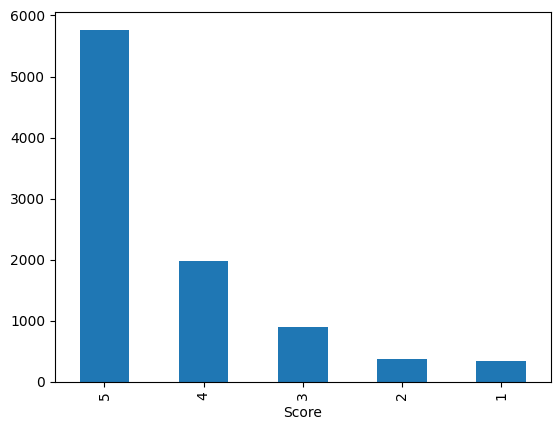

In [126]:
f['Score'].value_counts().plot(kind='bar') # use the plot function to creat plot and choose kind for which type of graph you want

In [128]:
f['Score'].value_counts()/len(f)*100

,count
Score,
5,61.605044
4,21.147681
3,9.585381
2,3.932464
1,3.729429


In [130]:
not_f['Score'].value_counts()/len(not_f)*100

,count
Score,
5,63.757986
4,14.071191
1,9.349850
3,7.507547
2,5.313426


<Axes: xlabel='Score'>

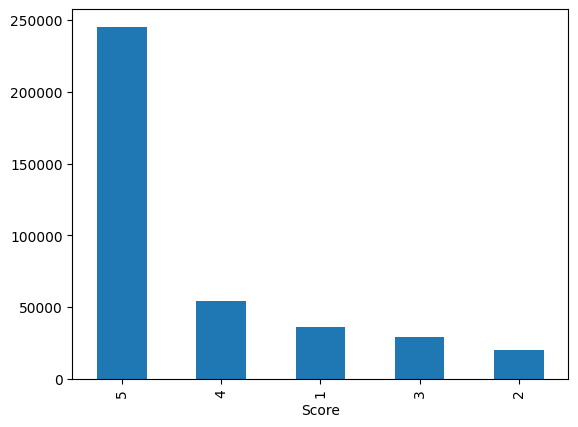

In [133]:
not_f['Score'].value_counts().plot(kind='bar')

In [135]:
data[['UserId','ProductId','Text']]

,UserId,ProductId,Text
0,A3SGXH7AUHU8GW,B001E4KFG0,I have bought several of the Vitality canned d...
1,A1D87F6ZCVE5NK,B00813GRG4,Product arrived labeled as Jumbo Salted Peanut...
2,ABXLMWJIXXAIN,B000LQOCH0,This is a confection that has been around a fe...
3,A395BORC6FGVXV,B000UA0QIQ,If you are looking for the secret ingredient i...
4,A1UQRSCLF8GW1T,B006K2ZZ7K,Great taffy at a great price. There was a wid...
...,...,...,...
568449,A28KG5XORO54AY,B001EO7N10,Great for sesame chicken..this is a good if no...
568450,A3I8AFVPEE8KI5,B003S1WTCU,I'm disappointed with the flavor. The chocolat...
568451,A121AA1GQV751Z,B004I613EE,"These stars are small, so you can give 10-15 o..."
568452,A3IBEVCTXKNOH,B004I613EE,These are the BEST treats for training and rew...


In [ ]:
 # are frequent user more verbal



In [136]:
data['Text'][0] # tyext is a strig function

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [137]:
len(data['Text'][0].split(' ')) # we use split function to make it a list than we can use the len function to calculate the number of words

49

In [139]:
def calculate_length(text):
  return len(text.split(' '))

In [140]:
data['Text_length']=data['Text'].apply(calculate_length )# apply the function calculate_length

<ipython-input-140-34082f92d618>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Text_length']=data['Text'].apply(calculate_length )# apply the function calculate_length


In [141]:
data['Text_length']

,Text_length
0,49
1,31
2,99
3,43
4,30
...,...
568449,26
568450,46
568451,71
568452,37


In [142]:
data['viewers_type'].unique()

array(['Not Frequent', 'Frequent'], dtype=object)

In [143]:
f_data=data[data['viewers_type']=='Frequent']
not_f_data=data[data['viewers_type']=='Not Frequent']

In [144]:
not_f_data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewers_type,Text_length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent,99
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent,43
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent,30
...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,Not Frequent,26
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,Not Frequent,46
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",Not Frequent,71
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,Not Frequent,37


In [145]:
data.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewers_type,Text_length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent,31


Text(0.5, 0, 'Not Frequent Reviewers')

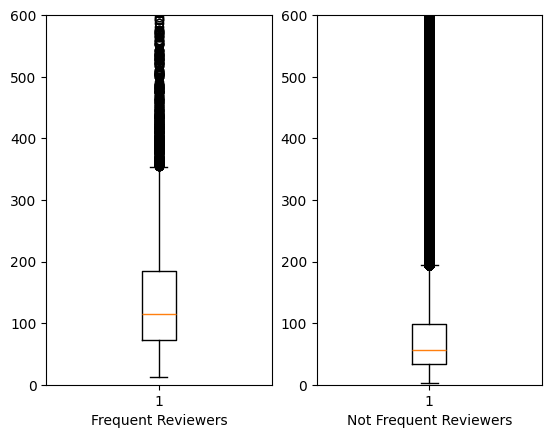

In [149]:
fig=plt.figure()
ax1=fig.add_subplot(121)
ax1.boxplot(f_data['Text_length'])
ax1.set_ylim(0,600)
ax1.set_xlabel('Frequent Reviewers')
ax2=fig.add_subplot(122)
ax2.boxplot(not_f_data['Text_length'])
ax2.set_ylim(0,600)
ax2.set_xlabel('Not Frequent Reviewers')

In [150]:
from textblob import TextBlob

In [151]:
data['Summary'][0]

'Good Quality Dog Food'

In [153]:
TextBlob('Good Quality Dog Food').sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [154]:
TextBlob('Good Quality Dog Food').sentiment.polarity

0.7

In [155]:
data.shape


(393931, 12)

In [156]:
sample=data[0:50000]

In [159]:
polarity=[]
for text in sample['Summary']:
  try:
    polarity.append(TextBlob(text).sentiment.polarity)
  except:
    polarity.append(0)

In [160]:
len(polarity)

50000

In [161]:
sample['polarity']=polarity

<ipython-input-161-5c3f84b40d50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['polarity']=polarity


In [162]:
sample.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewers_type,Text_length,polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent,49,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent,31,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent,99,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent,43,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent,30,0.8


In [165]:
sample_neg=sample[sample['polarity']<0]

In [166]:
sample[sample['polarity']<0]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewers_type,Text_length,polarity
16,17,B001GVISJM,A3KLWF6WQ5BNYO,Erica Neathery,0,0,2,1348099200,poor taste,I love eating them and they are good for watch...,Not Frequent,42,-0.400000
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan...",Not Frequent,22,-1.000000
57,58,B004N5KULM,ASCNNAJU6SXF8,S. Beck,1,1,5,1336176000,How can you go wrong!,"It is chocolate, what can I say. Great variet...",Not Frequent,36,-0.625000
61,62,B004N5KULM,A7ZK2A3VIW7X9,Peggy,0,2,5,1319414400,pretty expensive,"This bag of candy online is pretty expensive, ...",Not Frequent,30,-0.125000
62,63,B001EO5TPM,A1E09XGZUR78C6,gary sturrock,2,2,1,1215302400,stale product.,Arrived in 6 days and were so stale i could no...,Not Frequent,17,-0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54185,54186,B001D0FT0C,ARS0COV4PYKLF,toddler mom,0,0,1,1336608000,Horrible,"ProFlowers sent the flowers to ME, the buyer. ...",Not Frequent,31,-1.000000
54186,54187,B001D0FT0C,AOQ5WRZT9OKGJ,D. M. Castro,7,11,1,1329177600,Horrible idea,Ordered these to be delivered on the tenth of ...,Not Frequent,152,-1.000000
54191,54192,B004OVICTW,ALX6CSFZ6Z5XD,LizzieW,0,0,1,1317859200,STALE,This coffee and another WP variety that I ord...,Not Frequent,44,-0.500000
54212,54213,B0000TLRIA,A1UR9Y284SMTH7,SUZANNE G,0,0,2,1344124800,Disappointed,I ordered this because I ran out of another br...,Not Frequent,62,-0.750000


In [167]:
sample_posi=sample[sample['polarity']>0]

In [168]:
sample[sample['polarity']>0]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewers_type,Text_length,polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent,49,0.700000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent,30,0.800000
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,Not Frequent,72,0.600000
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,Not Frequent,53,0.358333
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,Not Frequent,28,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54248,54249,B001H0FI22,AL6U52M47C5YV,Stephen M. Vakil,1,1,5,1242950400,My favorite nescafe dolce flavor,This is my favorite type of cap for the dolce ...,Not Frequent,85,0.500000
54249,54250,B001H0FI22,A3G7BEJJCPD6DS,LuxuryReading,1,1,4,1242777600,My 2nd Favorite,This is my 2nd favorite Nescafe drink after th...,Not Frequent,62,0.250000
54250,54251,B001H0FI22,AM8W6Y3HVXLZT,"D. P. Schroeder ""Paukenwirbel""",3,4,4,1242000000,Best of 5 flavors available,This flavor is by far the best of the 5 flavor...,Not Frequent,80,0.700000
54252,54253,B001H0FI22,AROBCX5WMM863,toni t haugen,0,0,4,1351036800,pricey but good.,"the cappuccino is very good, but because there...",Not Frequent,59,0.700000


In [172]:
from collections import Counter

In [170]:
sample_neg['Summary']

,Summary
16,poor taste
26,Nasty No flavor
57,How can you go wrong!
61,pretty expensive
62,stale product.
...,...
54185,Horrible
54186,Horrible idea
54191,STALE
54212,Disappointed


In [174]:
Counter(sample_neg['Summary']).most_common(10)

[('Disappointed', 44),
 ('Disappointing', 32),
 ('Bland', 18),
 ('Awful', 17),
 ('Not what I expected', 17),
 ('Terrible', 15),
 ('Horrible', 15),
 ('disappointed', 15),
 ('Disgusting', 12),
 ('not good', 11)]

In [175]:
Counter(sample_posi['Summary']).most_common(10)

[('Delicious!', 208),
 ('Delicious', 204),
 ('Great product', 100),
 ('Excellent', 85),
 ('Love it!', 81),
 ('Great', 81),
 ('Great Product', 77),
 ('Great!', 70),
 ('Good stuff', 51),
 ('Awesome', 50)]